# Вайтехович Игорь

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
df = pd.read_excel("price.xlsx")
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<span style='color:rgb(0,12,102)'><b>Проведём переименование столбцов:</b></span>

In [23]:
df = df.rename(columns = {'Unnamed: 0':'number'})
df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df

,number,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<span style='color:rgb(0,12,102)'><b>1. Построить корреляционную матрицу, выбрать факторы, которые в большей степени связаны с ценой</b></span>

In [24]:
corr = df.corr()
corr.style.background_gradient(cmap='RdYlGn')

,number,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
number,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


<span style='color:rgb(50,200,0)'><b>Наиболее сильно с показателем цены связаны показатели rm и lstat</b></span>

<span style='color:rgb(0,12,102)'><b>2. Построить линейную модель регрессии с включением одного фактора (построить несколько моделей с включением 1 фактора и сравнить их коэффициенты детерминации),описать модель, описать значение коэффициента детерминации, построить график модели.</b></span>

<span style='color:rgb(0,12,102)'><b>Построим модель используя price и rm</b></span>

In [25]:
X1 = df.rm
Y1 = df.price
X1 = sm.add_constant(X1)
model = sm.OLS(Y1,X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           2.49e-74
Time:                        10:31:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

<span style='color:rgb(0,255,0)'><b>Получим модель</b></span> <span style='color:rgb(255,30,0)'>y = -34.6706 + 9.1021*x</span>, <span style='color:rgb(0,255,0)'><b>которую можно интерпретировать так: при увеличении показателя rm на 1, показатель price в среднем возрастёт на 9.1021</b></span>

<span style='color:rgb(0,255,0)'><b>При оценке регрессионной модели значение коэффициента детерминации интерпретируется как соответствие модели данным, т.е. чем ближе его значение к 1, тем сильнее зависимость между данными. В данном случае 48.4% изменений price вызваны изменением rm.</b></span>

<span style='color:rgb(0,255,0)'><b>Т.к. p-value < 0.05, то коэффициенты регрессии статистически значимые.</b></span>

<span style='color:rgb(0,12,102)'><b>Построим график модели:</b></span>

<AxesSubplot:xlabel='rm', ylabel='price'>

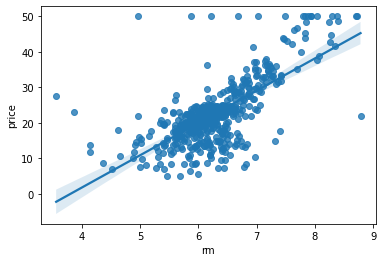

In [36]:
sns.regplot(x = df.rm,y = df.price,data = df)

<span style='color:rgb(0,12,102)'><b>Построим модель используя price и lstat</b></span>

In [38]:
X2 = df.lstat
Y2 = df.price
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2,X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           5.08e-88
Time:                        10:53:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

<span style='color:rgb(0,255,0)'><b>Получим модель</b></span> <span style='color:rgb(255,30,0)'>y = 34.5538 - 0.9500*x</span>, <span style='color:rgb(0,255,0)'><b>которую можно интерпретировать так: при увеличении показателя lstat на 1, показатель price в среднем уменьшится на 0.95</b></span>

<span style='color:rgb(0,255,0)'><b>При оценке регрессионной модели значение коэффициента детерминации интерпретируется как соответствие модели данным, т.е. чем ближе его значение к 1, тем сильнее зависимость между данными. В данном случае 54.4% изменений price вызваны изменением lstat.</b></span>

<span style='color:rgb(0,255,0)'><b>Т.к. p-value < 0.05, то коэффициенты регрессии статистически значимые.</b></span>

<span style='color:rgb(0,12,102)'><b>Построим график модели:</b></span>

<AxesSubplot:xlabel='lstat', ylabel='price'>

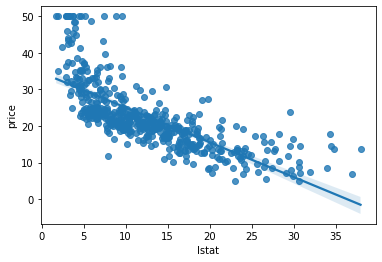

In [41]:
sns.regplot(x = df.lstat,y = df.price,data = df)

<span style='color:rgb(0,12,102)'><b>Построим также для данных price и ptratio (между ними коэфф. корелляции -0.5, что свидетельствует о не слишком сильной корреляции, но всё равно большей, чем у price со всеми оставшимися)</b></span>

In [42]:
X3 = df.ptratio
Y3 = df.price
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3,X3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           1.61e-34
Time:                        10:59:22   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.029     20.581      0.0

<span style='color:rgb(0,255,0)'><b>Получим модель</b></span> <span style='color:rgb(255,30,0)'>y = 62.3446 - 2.1572*x</span>, <span style='color:rgb(0,255,0)'><b>которую можно интерпретировать так: при увеличении показателя ptratio на 1, показатель price в среднем уменьшится на 2.1572</b></span>

<span style='color:rgb(0,255,0)'><b>При оценке регрессионной модели значение коэффициента детерминации интерпретируется как соответствие модели данным, т.е. чем ближе его значение к 1, тем сильнее зависимость между данными.В данном случае 25.8% изменений price вызваны изменением ptratio.</b></span>

<span style='color:rgb(0,255,0)'><b>Т.к. p-value < 0.05, то коэффициенты регрессии статистически значимые.</b></span>

<span style='color:rgb(0,12,102)'><b>Построим график модели:</b></span>

<AxesSubplot:xlabel='ptratio', ylabel='price'>

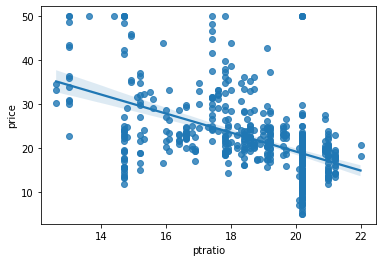

In [43]:
sns.regplot(x = df.ptratio,y = df.price,data = df)

<span style='color:rgb(0,255,0)'><b>Из построенных моделей видно, что самый большой коэффициент детерминации у модели, построенной на данных price и lstat, что свидетельствует о том, что в данном случае данные "связаны" друг с другом сильнее всего. Это также видно было по коэффициенту корелляции.</b></span>